## Plotting Residual Streams

### Definitions

In [1]:
import random
from time_stuff.utils import ActivationDataset, SupervisedMDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import Normalizer
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import MDS
from umap import UMAP
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.patheffects as pe
from pycolormap_2d import ColorMap2DZiegler

In [ ]:
# General script for plotting activations
def datetime_to_dayofyear(x):
    # Convert to datetime
    x = pd.to_datetime(x)
    # Get the day of the year
    return x.day_of_year

def datetime_to_month(x):
    # Convert to datetime
    x = pd.to_datetime(x)
    # Get the month
    return x.month

def farthest_point_sampling(X, k, noise=0.1):
    n_points = X.shape[0]
    selected_indices = [np.random.randint(n_points)]
    distances = np.full(n_points, np.inf)

    for _ in range(1, k):
        last_selected = X[selected_indices[-1]]
        dist_to_last = np.linalg.norm(X - last_selected, axis=1)
        distances = np.minimum(distances, dist_to_last)
        # Add noise to distances proportional to their magnitude
        distances += noise * np.abs(distances) * np.random.rand(n_points)
        next_index = np.argmax(distances)
        selected_indices.append(next_index)

    return selected_indices




### Dates

0.8087349397590361


1it [00:01,  1.13s/it]

Layer: 0 Score: 0.45168373701220277


2it [00:02,  1.10s/it]

Layer: 3 Score: 0.7020985629502668


3it [00:03,  1.10s/it]

Layer: 7 Score: 0.7882393239670105


4it [00:04,  1.09s/it]

Layer: 10 Score: 0.7863025509858093


5it [00:05,  1.08s/it]

Layer: 14 Score: 0.8075206822150911


6it [00:06,  1.08s/it]

Layer: 18 Score: 0.7978376110166416


7it [00:07,  1.08s/it]

Layer: 21 Score: 0.8444675528178524


8it [00:08,  1.08s/it]

Layer: 25 Score: 0.8647206102276587


9it [00:09,  1.11s/it]

Layer: 28 Score: 0.8972128442480611


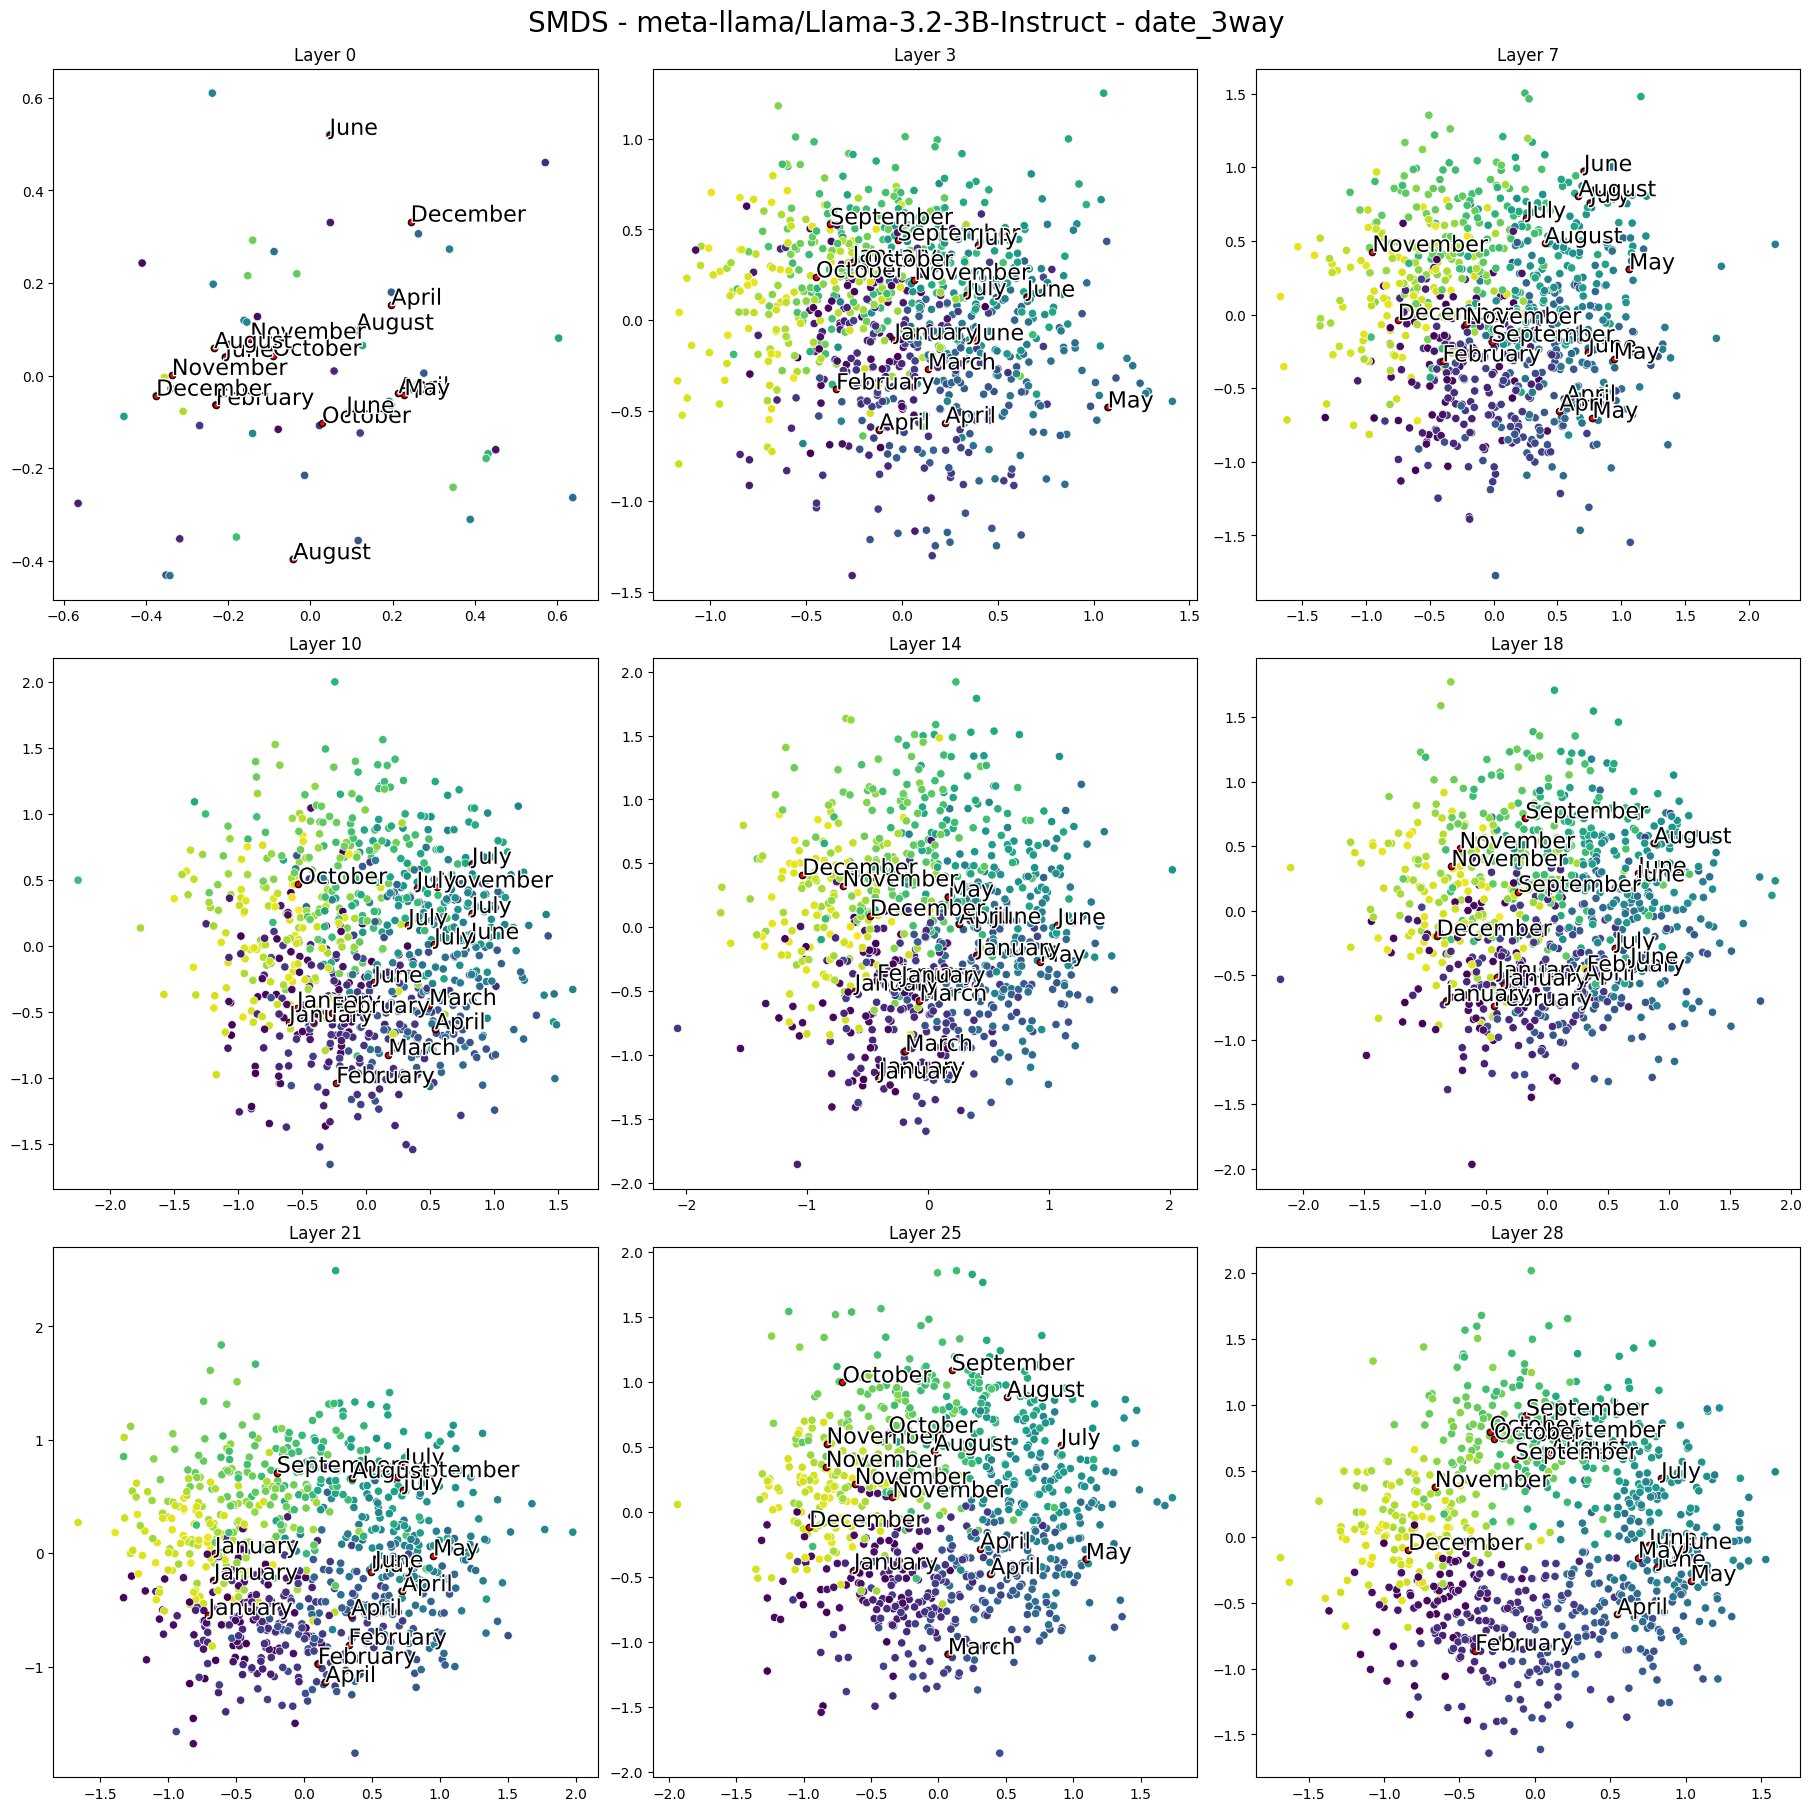

In [15]:
linspace = np.linspace(0, 1, 9)

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/date_3way_season.pt')
# # # layers = range(0, ad.n_layers, )
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = [14]
# plot_activations(ad, label_col='correct_season_label', layers=layers, reduction_method='SMDS', label_col_str='correct_season',
#                  plots_per_row=2, annotations='centroids', manifold='euclidean', n_components=3)

ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/date_3way.pt')
# ad = ActivationDataset.load('results/gpt2/date_1way.pt')
print(ad.get_accuracy())
# layers = range(0, ad.n_layers, 4)
layers = [int(np.clip(ad.n_layers * p, a_min=0, a_max=ad.n_layers-1)) for p in linspace]
# layers = [8]
plot_activations(ad, label_col='correct_date', target_col='correct_answer', layers=layers, reduction_method='SMDS',
                 label_col_str='correct_date',
                 preprocess_func=datetime_to_dayofyear, plots_per_row=3, manifold='circular', annotations='centroids',
                 filter_incorrect=True, annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%B'))

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/date_3way_2hop.pt')
# print(ad.get_accuracy())
# # layers = range(0, ad.n_layers, 4)
# layers = [int(np.clip(ad.n_layers * p, a_min=0, a_max=ad.n_layers-1)) for p in linspace]
# plot_activations(ad, label_col='correct_date', layers=layers, reduction_method='SMDS', label_col_str='correct_date', 
#                  preprocess_func=datetime_to_dayofyear, plots_per_row=3, manifold='euclidean')

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/date_3way_temperature.pt')
# print(ad.get_accuracy())
# # layers = range(0, ad.n_layers, 2)
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = [14]
# # plot_activations(ad, label_col='correct_temperature_label', layers=layers, reduction_method='SMDS', 
# #                  target_col='last_prompt_token',
# #                  label_col_str='correct_date', manifold='discrete_circular', plots_per_row=3, 
# #                  annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%B'))
# plot_activations(ad, label_col='correct_temperature_label', layers=layers, reduction_method='SMDS', 
#                  target_col='correct_answer',
#                  label_col_str='correct_date', manifold='log_linear', plots_per_row=3, 
#                  annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%B'))

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/date_3way_month.pt')
# # layers = range(0, ad.n_layers, 4)
# layers = [int(np.clip(ad.n_layers * p, a_min=0, a_max=ad.n_layers-1)) for p in linspace]
# # layers = [19]
# # plot_activations(ad, label_col='correct_date', layers=layers, reduction_method='PLS', label_col_str='correct_month', 
# #                  manifold='euclidean', preprocess_func=datetime_to_dayofyear)
# plot_activations(ad, label_col='correct_month_label', layers=layers, reduction_method='SMDS', label_col_str='correct_month', 
#                  manifold='discrete_circular', plots_per_row=3, annotations='centroids')

### Time of day

0.299


1it [00:01,  1.07s/it]

Layer: 1 Score: 0.4953574144624705


2it [00:02,  1.29s/it]

Layer: 3 Score: 0.5995532299524761


3it [00:03,  1.17s/it]

Layer: 7 Score: 0.7083199364665924


4it [00:04,  1.11s/it]

Layer: 10 Score: 0.8018229370008734


5it [00:05,  1.08s/it]

Layer: 14 Score: 0.779689334722063


6it [00:06,  1.06s/it]

Layer: 18 Score: 0.7654857938879457


7it [00:07,  1.04s/it]

Layer: 21 Score: 0.7571569083411843


8it [00:08,  1.03s/it]

Layer: 25 Score: 0.737239838306103


9it [00:09,  1.07s/it]

Layer: 28 Score: 0.7230236054149382


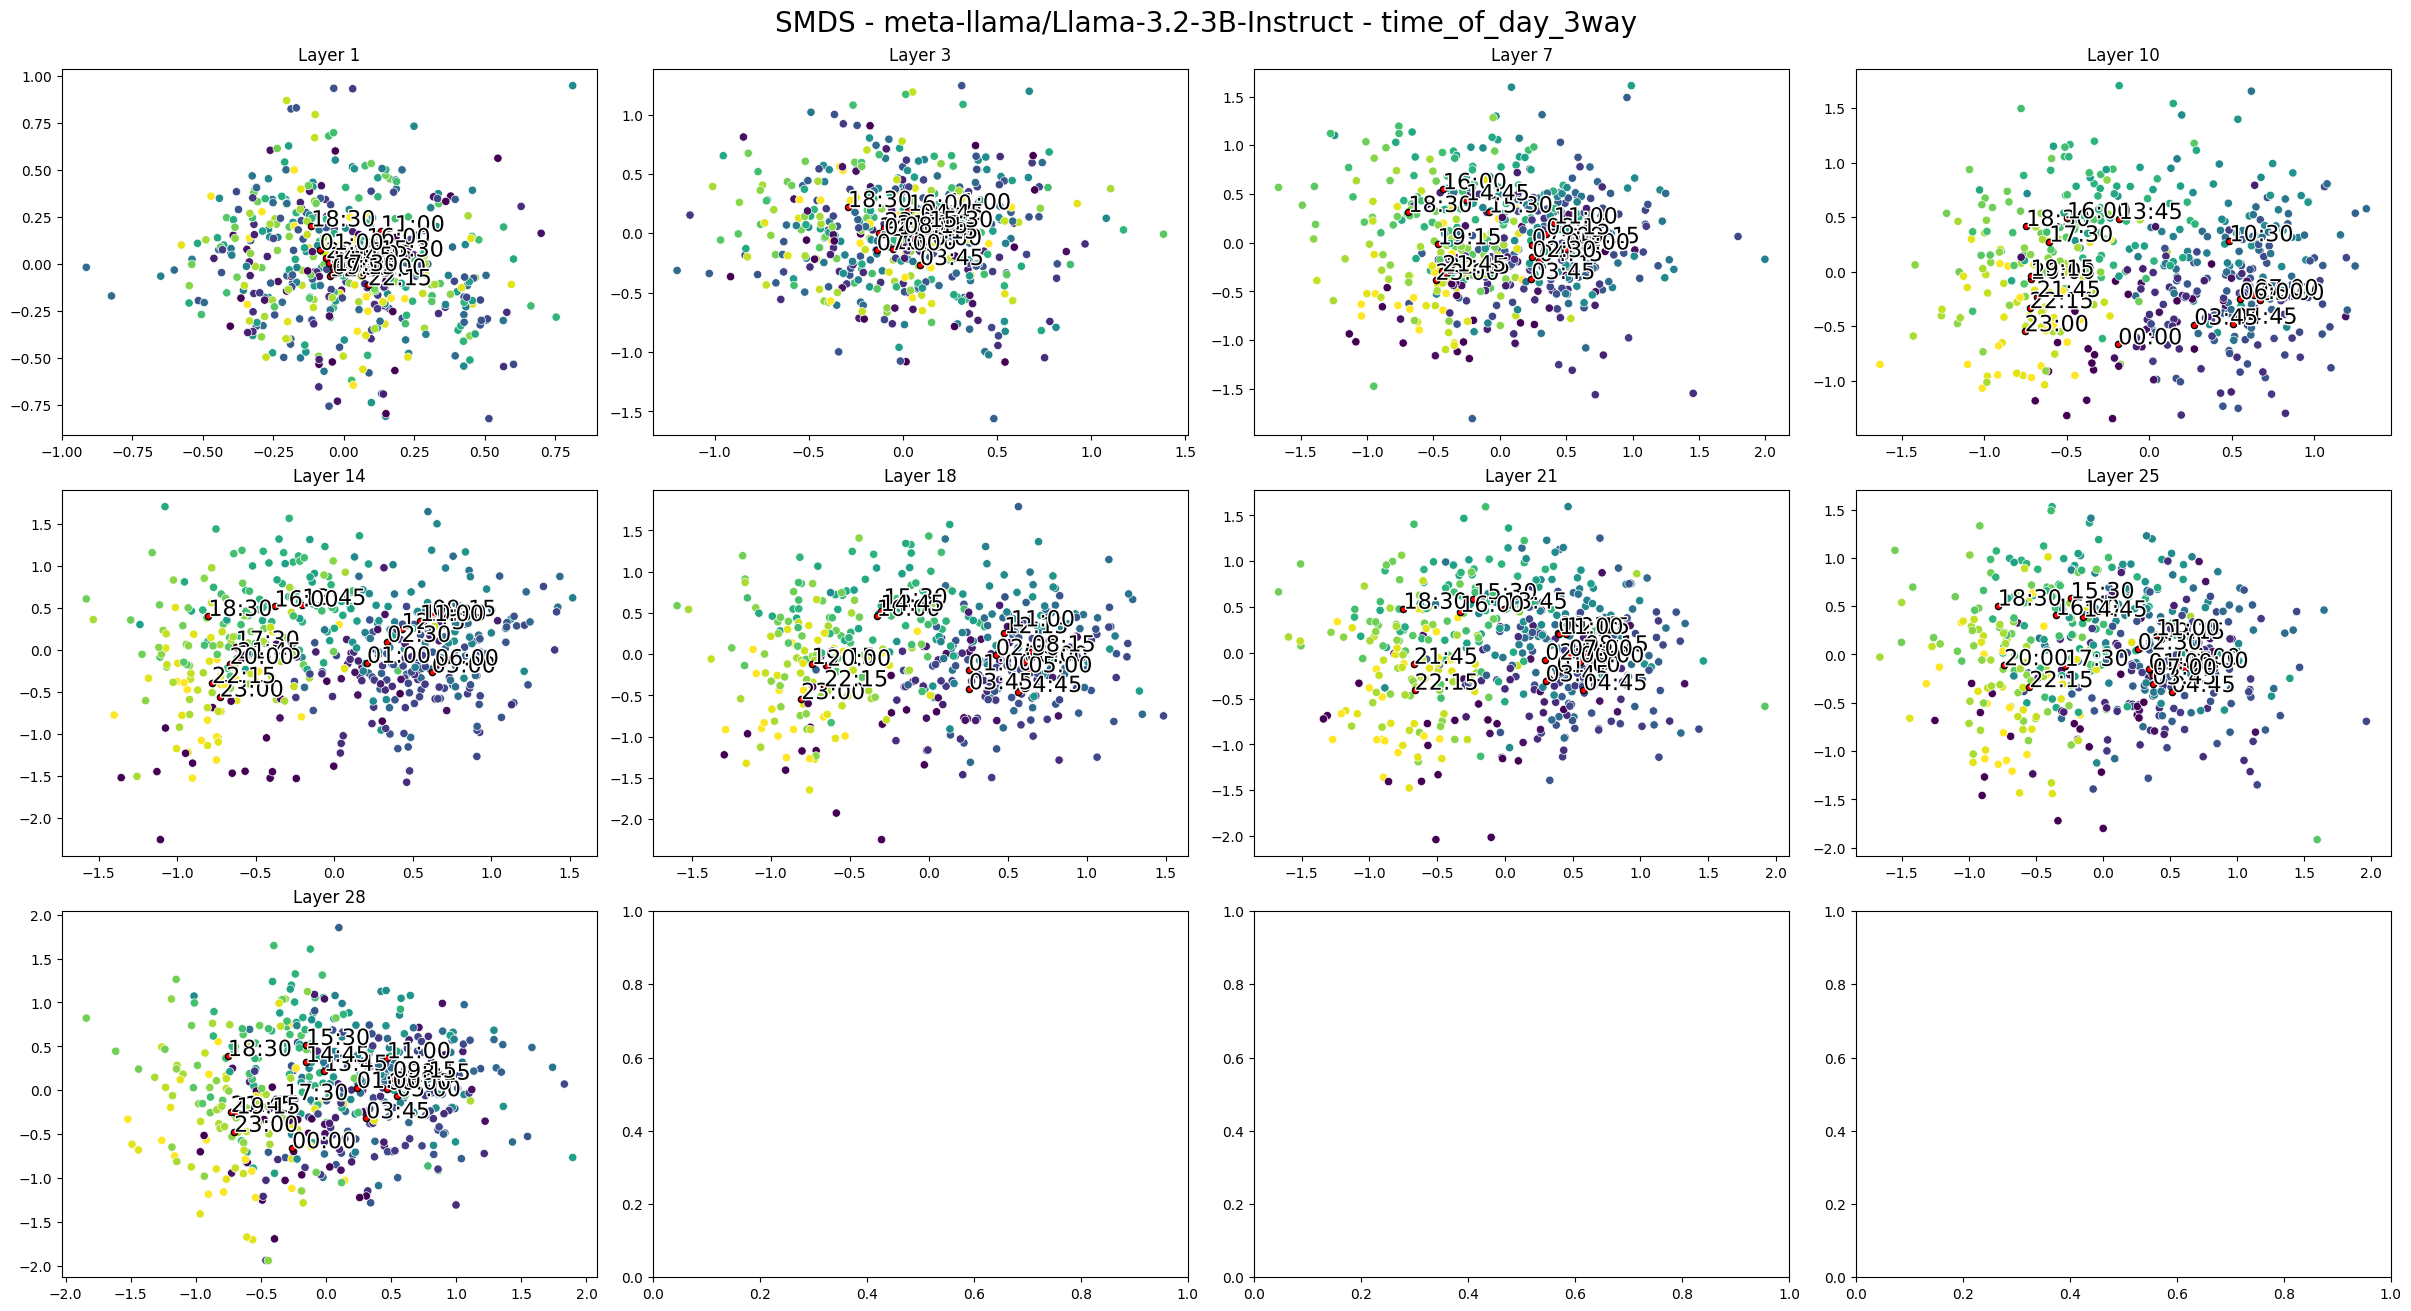

In [18]:
linspace = np.linspace(0, 1, 9)

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/time_of_day_HH:MM.pt')
# # layers = range(1, ad.n_layers, 1)
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = [8]
# plot_activations(ad, label_col='correct_hour', layers=layers, reduction_method='SMDS', label_col_str='correct_answer', annotations='uniform',
#                  plots_per_row=4, manifold='discrete_circular' )

ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/time_of_day_3way.pt')
print(ad.get_accuracy())
# layers = range(1, ad.n_layers, 1)
layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# layers = [18]
plot_activations(ad, label_col='correct_time', target_col='correct_answer', layers=layers, reduction_method='SMDS', label_col_str='correct_time', annotations='centroids',
                 plots_per_row=4, manifold='circular', preprocess_func=lambda x: pd.to_datetime(x).hour, filter_incorrect=True,
                 annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%H:%M'), n_components=3)

# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/time_of_day_3way_phase.pt')
# print(ad.get_accuracy())
# # layers = range(1, ad.n_layers, 1)
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = [8]
# plot_activations(ad, label_col='correct_phase_label', layers=layers, reduction_method='SMDS', label_col_str='correct_time', annotations='random',
#                  plots_per_row=4, manifold='discrete_circular')

### Periodic, Duration, Notable

0.32


1it [00:00,  1.56it/s]

Layer: 1 Score: 0.8136018992423821


2it [00:01,  1.64it/s]

Layer: 4 Score: 0.8510465547569722


3it [00:01,  1.68it/s]

Layer: 9 Score: 0.8914953571729333


4it [00:02,  1.70it/s]

Layer: 13 Score: 0.9212076671019628


5it [00:02,  1.70it/s]

Layer: 18 Score: 0.9495125121524337


6it [00:03,  1.69it/s]

Layer: 23 Score: 0.9378868546446447


7it [00:04,  1.65it/s]

Layer: 27 Score: 0.9099329716751274


8it [00:04,  1.62it/s]

Layer: 32 Score: 0.9297894498032117


9it [00:05,  1.66it/s]

Layer: 36 Score: 0.9219100797334983


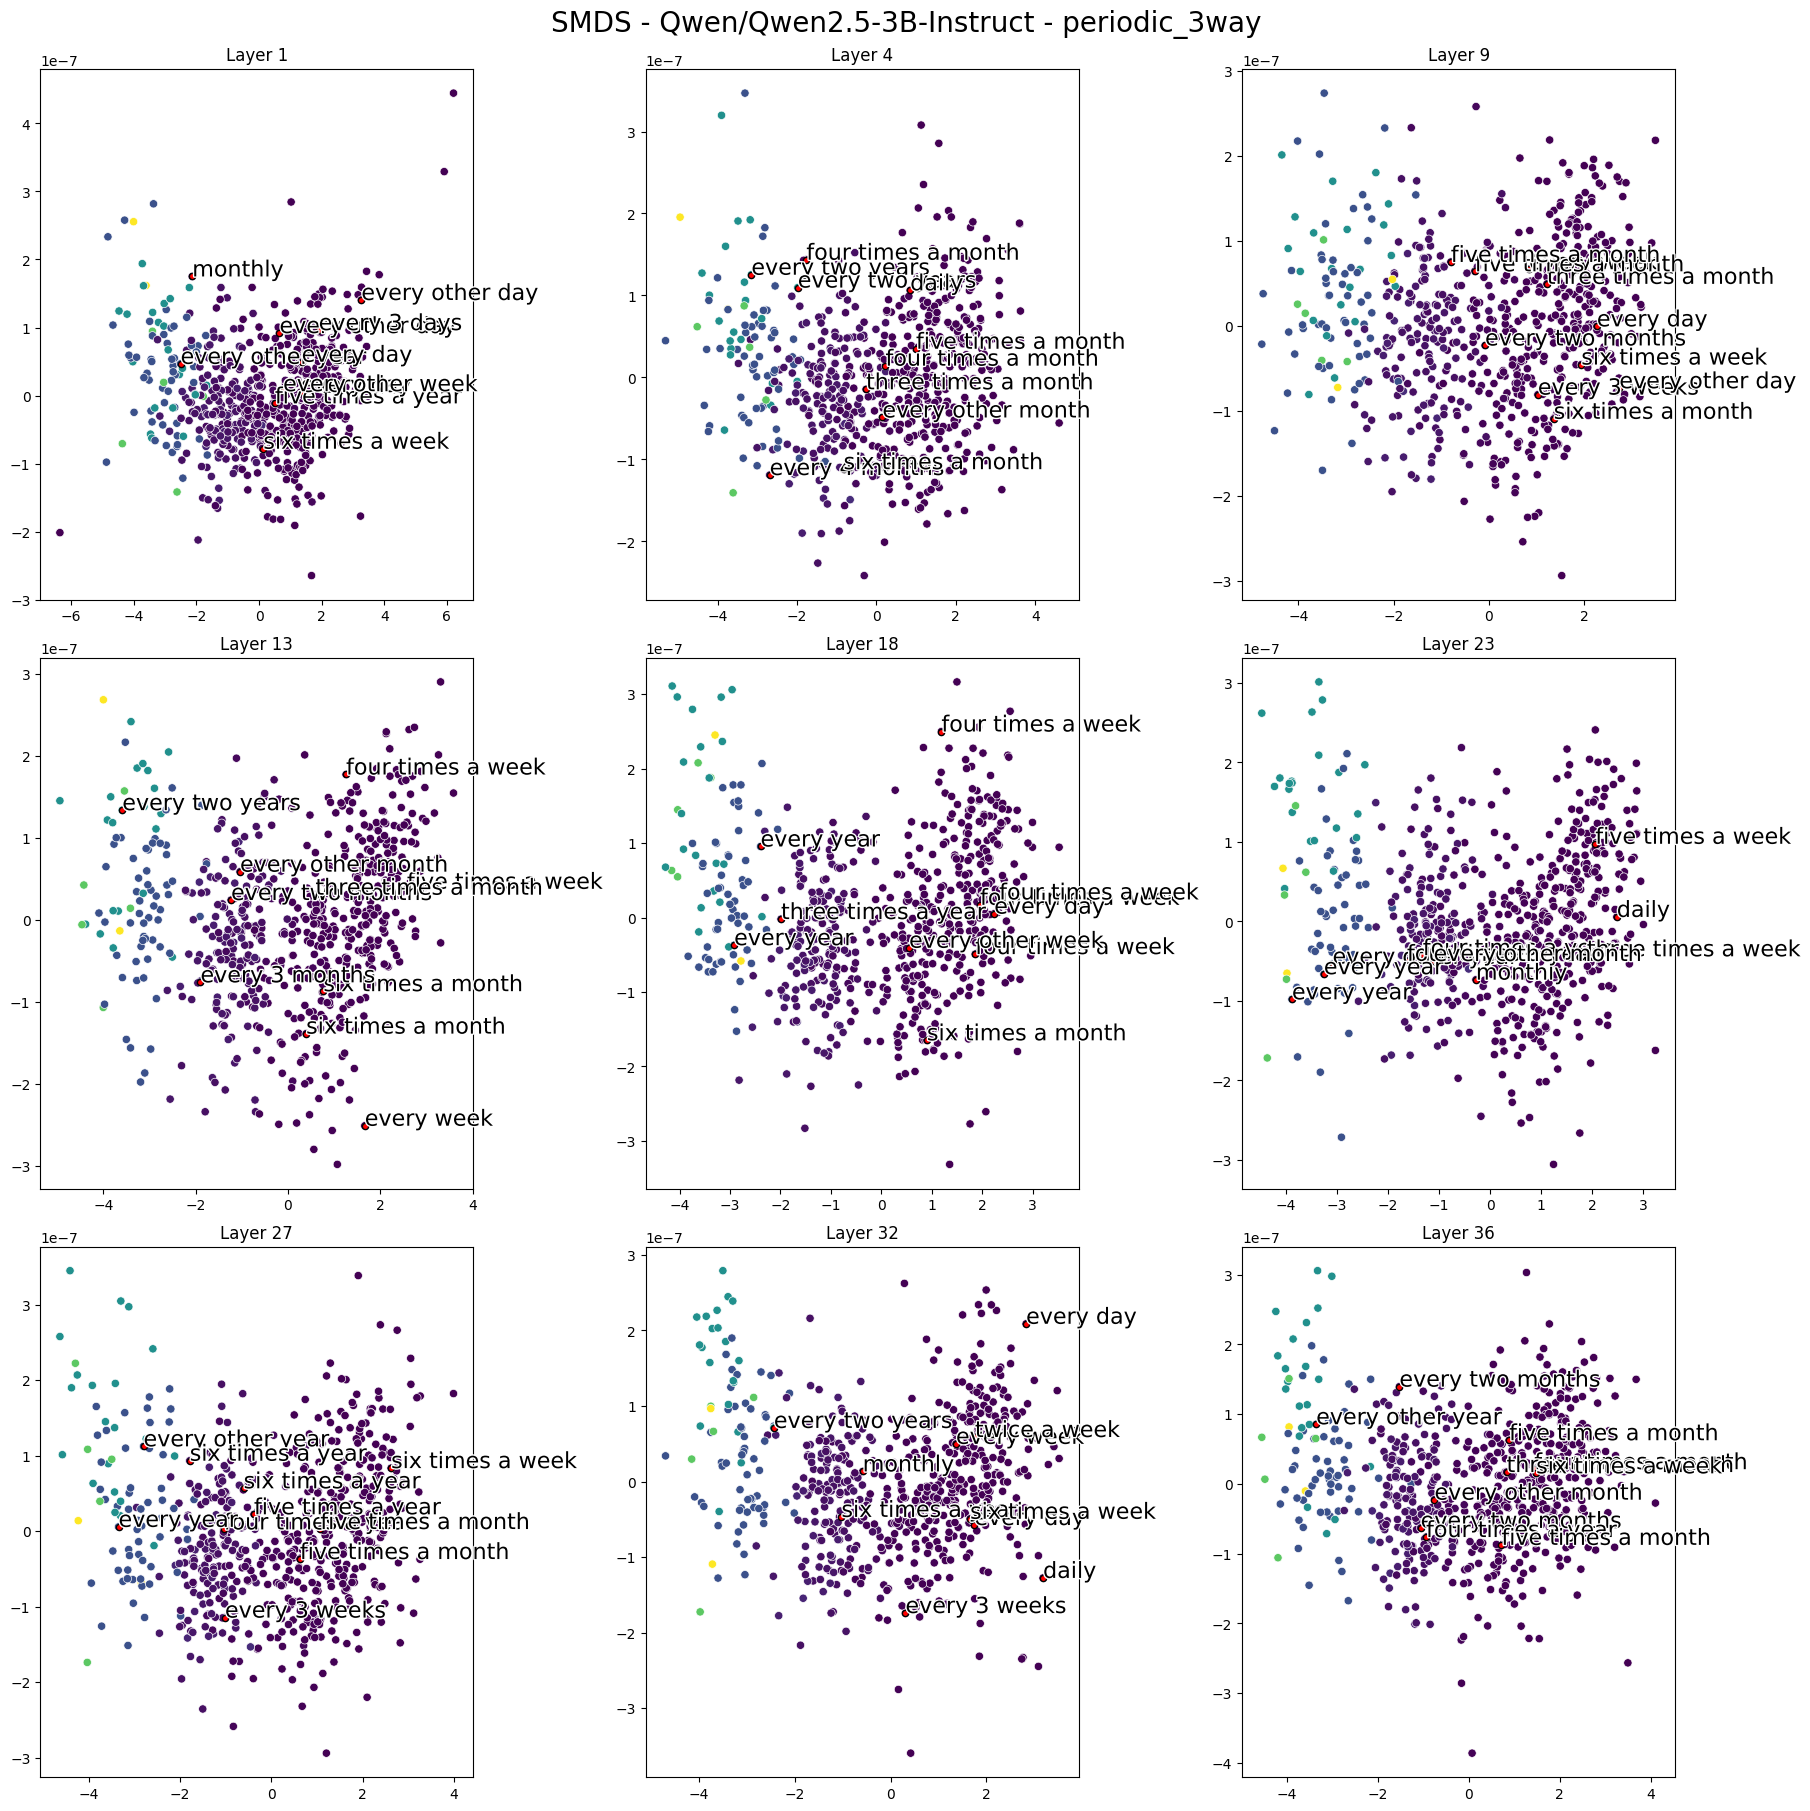

In [ ]:
linspace = np.linspace(0, 1, 9)

# # ad = ActivationDataset.load('results/gpt2/duration_3way.pt')
# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/duration_3way.pt')
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = range(1, ad.n_layers, 3)
# # # layers = [3, 11, 18, 27]
# print(ad.get_accuracy())
# # plot_activations(ad, label_col=['correct_duration_length', 'correct_date'], layers=layers, reduction_method='SMDS', plots_per_row=3,
# #                  label_col_str=['correct_month', 'correct_duration_str'], preprocess_func=[lambda x: np.log(x), datetime_to_dayofyear], manifold='euclidean', 
# #                  annotations='random', annotation_preprocess_func=lambda x: x[0] + '\n' + x[1], n_components=10)
# plot_activations(ad, label_col=['correct_duration_length'], target_col='correct_answer', layers=layers, reduction_method='SMDS', plots_per_row=3,
#                  label_col_str=['correct_month', 'correct_duration_str'], preprocess_func=lambda x: np.log(x), manifold='log_linear', annotations='random',
#                  annotation_preprocess_func=lambda x: x[0] + '\n' + x[1], filter_incorrect=True, orthonormal=True)


# ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/periodic_3way.pt')
# ad = ActivationDataset.load('results/Qwen2.5-3B-Instruct/periodic_3way.pt')
# layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
# # layers = range(1, ad.n_layers, 3)
# # # layers = [3, 11, 18, 27]
# print(ad.get_accuracy())
# plot_activations(ad, label_col='correct_period_length', layers=layers, reduction_method='SMDS', plots_per_row=3,
#                  label_col_str='correct_period_str', preprocess_func=lambda x: np.log(x), manifold='euclidean', annotations='random',
#                  filter_incorrect=True, orthonormal=True)
# plot_activations(ad, label_col='correct_period_length', layers=layers, reduction_method='SMDS', plots_per_row=3,
#                  label_col_str='correct_period_str', manifold='circular', annotations='random',
#                  filter_incorrect=True, orthonormal=True,)
# plot_activations(ad, label_col='correct_period_length', layers=layers, reduction_method='SMDS', plots_per_row=3,
#                  label_col_str='correct_period_str', manifold='log_linear', annotations='random',
#                  filter_incorrect=True, n_components=3)

# ad = ActivationDataset.load('results/gpt2/notable_3way.pt')
# print(ad.get_metadata_df()['answer'])
ad = ActivationDataset.load('results/Llama-3.2-3B-Instruct/notable_3way.pt')
# layers = range(0, ad.n_layers, 2)
layers = [int(np.clip(ad.n_layers * p, a_min=1, a_max=ad.n_layers-1)) for p in linspace]
min_date = pd.to_datetime(ad.get_metadata_df()['correct_date']).min()
max_date = pd.to_datetime(ad.get_metadata_df()['correct_date']).max()
min_year = min_date.year
max_year = max_date.year
# Normalize the dates to a 0-1 range. Dates are across the 20th century
# preprocess_func = lambda x: (pd.to_datetime(x) - min_date).total_seconds() / (max_date - min_date).total_seconds()
# plot_activations(ad, label_col='correct_date', layers=layers, reduction_method='SMDS', label_col_str='correct_date',
#                  manifold='euclidean', preprocess_func=lambda x: np.log((pd.to_datetime(x).year - min_year)/1000 + 1), plots_per_row=3, n_components=3, components=(0,1),
                #  annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%Y'), annotations='uniform',)
# plot_activations(ad, label_col='correct_date', layers=layers, reduction_method='SMDS', label_col_str='correct_date',
#                  manifold='log_linear', preprocess_func=lambda x: np.abs(pd.to_datetime(x).year - 2023), plots_per_row=3, n_components=3, components=(0,1),
#                  annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%Y'), annotations='centroids', orthonormal=True)
plot_activations(ad, label_col='correct_date', layers=layers, reduction_method='SMDS', label_col_str='correct_date',
                 manifold='semicircular', preprocess_func=lambda x:  pd.to_datetime(x).year, plots_per_row=3, n_components=3, components=(0,1),
                 annotation_preprocess_func=lambda x: pd.to_datetime(x).strftime('%Y'), annotations='centroids')

# Need a way to distinguish runs made with the same manifold but with a different preprocess_func
